## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results and make data frames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

#Merge with an outer join using "Mouse ID"
mouse_study_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(f"The number of overall data points is: {mouse_study_df['Mouse ID'].count()}.")
print(f"The number of unique mice is: {len(mouse_study_df['Mouse ID'].unique())}.")

The number of overall data points is: 1893.
The number of unique mice is: 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df["ConcatTime+ID"] = mouse_study_df["Timepoint"].map(str) + mouse_study_df["Mouse ID"].map(str)

#Check for duplicated mouse based on the concatenation. Print the results. Goal is to determine the Mouse ID and then use that to
#remove that mouse from the data set even if it is not duplicated for each Timepoint.
dupe_mouse = mouse_study_df.duplicated(subset=["ConcatTime+ID"])
if dupe_mouse.any():
    print(mouse_study_df.loc[dupe_mouse])



    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites ConcatTime+ID  
909           45.000000                 0         0g989  
911           47.570392                 0         5g989  
913           49.880528                 0        10g989  
915           53.442020                 0        15g989  
917           54.657650                 1        20g989  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean data frame by only including rows where the Mouse ID is not equal to g989 and then dropping the "ConcatTime+ID"
#column as it is no longer needed.
mouse_study_clean = mouse_study_df.loc[mouse_study_df["Mouse ID"] != "g989"]
del mouse_study_clean["ConcatTime+ID"]
mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"The number of overall data points is: {mouse_study_clean['Mouse ID'].count()}.")
print(f"The number of unique mice is: {len(mouse_study_clean['Mouse ID'].unique())}.")

The number of overall data points is: 1880.
The number of unique mice is: 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_gb = mouse_study_clean.groupby("Drug Regimen")

regimen_summary = {"Mean": regimen_gb["Tumor Volume (mm3)"].mean(), 
                   "Median": regimen_gb["Tumor Volume (mm3)"].median(),
                   "Variance": regimen_gb["Tumor Volume (mm3)"].var(),
                   "Mode": regimen_gb["Tumor Volume (mm3)"].std(),
                  "SEM": regimen_gb["Tumor Volume (mm3)"].sem()}
                                     
                                      

regimen_summary_df = pd.DataFrame(regimen_summary)
regimen_summary_df.head()


,Mean,Median,Variance,Mode,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line of code:
regimen_gb.aggregate({"Tumor Volume (mm3)":['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

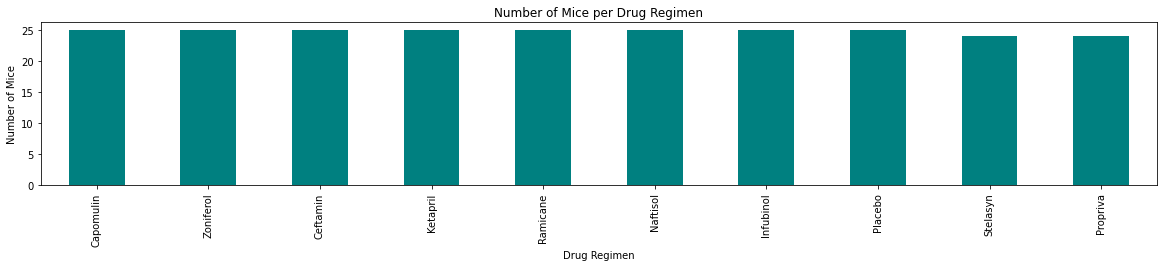

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas. 
#New data frame using the Drug Regimen and the Mouse ID are created and then dropping the duplicates.
#Drug Regimen is the x-axis and # of mice is the y-axis
regimen_bar_pd = mouse_study_clean.loc[:,["Drug Regimen","Mouse ID"]]
regimen_bar_pd = regimen_bar_pd.drop_duplicates()

num_mice = regimen_bar_pd["Drug Regimen"].value_counts()
num_chart = num_mice.plot(kind = 'bar', facecolor = 'teal', figsize=(20,3))

num_chart.set_title("Number of Mice per Drug Regimen")
num_chart.set_ylabel("Number of Mice")
num_chart.set_xlabel("Drug Regimen")

plt.show()
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



<AxesSubplot:ylabel='Sex'>

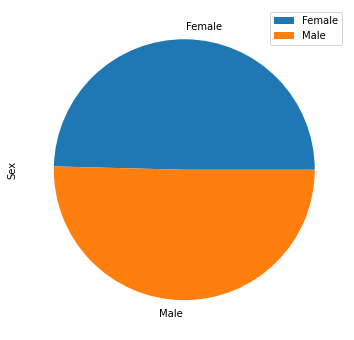

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice = mouse_study_clean.loc[:,["Sex","Mouse ID"]]
gender_mice = gender_mice.drop_duplicates()


gender_gb = gender_mice.groupby("Sex")
gender_gb = gender_gb["Sex"].count()

gender_df = pd.DataFrame(gender_gb)

gender_df.plot(kind = 'pie', y = "Sex", figsize = (6,6))

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
